In [1]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, LabelBinarizer, OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures, Binarizer
from sklearn import datasets

In [2]:
X = np.array(["chat", "chien", "chat", "oiseau"])

In [3]:
transformer = LabelEncoder()

In [4]:
transformer.fit(X)

LabelEncoder()

In [5]:
y = transformer.transform(X)
y

array([0, 1, 0, 2])

In [6]:
transformer.inverse_transform(y)

array(['chat', 'chien', 'chat', 'oiseau'], dtype='<U6')

In [7]:
multi_transformer = OrdinalEncoder()

In [8]:
X_multi = ([["chat", "chien"],
            ["oiseau", "chat"],
            ["poisson", "chien"]])

In [9]:
multi_transformer.fit_transform(X_multi)

array([[0., 1.],
       [1., 0.],
       [2., 1.]])

In [10]:
encoder = LabelBinarizer(sparse_output=True)

In [11]:
encoder.fit_transform(X)

<4x3 sparse matrix of type '<class 'numpy.int32'>'
	with 4 stored elements in Compressed Sparse Row format>

In [12]:
multi_encoder = OneHotEncoder()

In [13]:
multi_encoder.fit_transform(X_multi)

<3x5 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [14]:
scaler = MinMaxScaler()

In [15]:
Num = np.array([[70],
                [80],
                [100]])

In [16]:
scaler.fit_transform(Num)

array([[0.        ],
       [0.33333333],
       [1.        ]])

In [17]:
import matplotlib.pyplot as plt

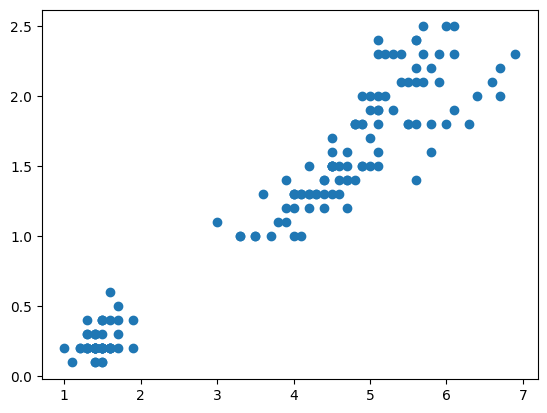

In [18]:
iris = datasets.load_iris()
X = iris.data
plt.scatter(X[:,2], X[:,3])

In [19]:
X_min_max = MinMaxScaler()

In [20]:
X_transform = X_min_max.fit_transform(X)

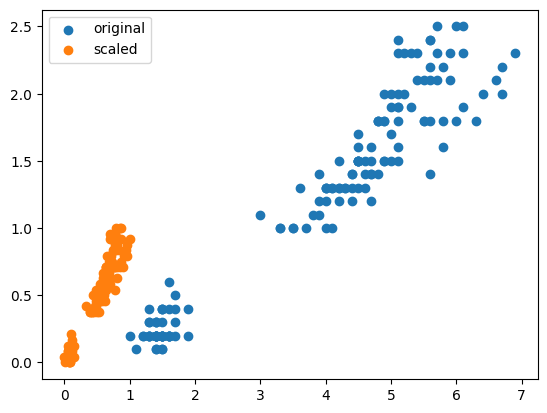

In [21]:
plt.scatter(X[:,2], X[:,3], label="original")
plt.scatter(X_transform[:,2], X_transform[:,3], label="scaled")
plt.legend()

In [22]:
X_standard = StandardScaler()

In [23]:
X_transform_standard = X_standard.fit_transform(X)

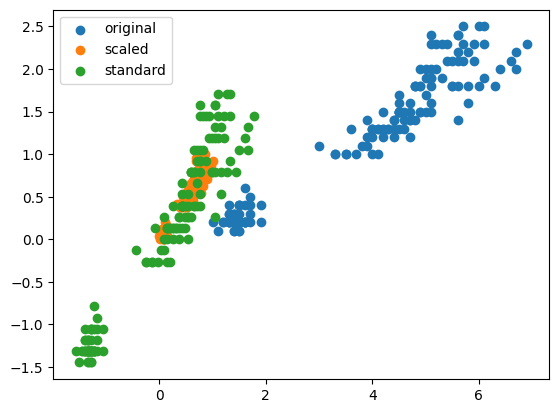

In [24]:
plt.scatter(X[:,2], X[:,3], label="original")
plt.scatter(X_transform[:,2], X_transform[:,3], label="scaled")
plt.scatter(X_transform_standard[:,2], X_transform_standard[:,3], label="standard")
plt.legend()

In [25]:
outliers = np.full((10,4), 100) + np.random.randn(10, 4)
X = np.vstack((X, outliers))


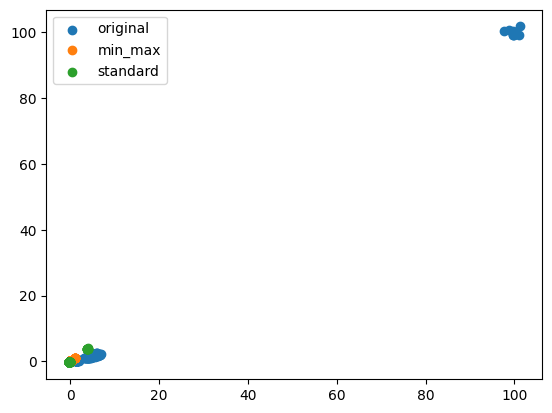

In [26]:
X_transform = X_min_max.fit_transform(X)
X_transform_standard = X_standard.fit_transform(X)
plt.scatter(X[:,2], X[:,3], label="original")
plt.scatter(X_transform[:,2], X_transform[:,3], label="min_max")
plt.scatter(X_transform_standard[:,2], X_transform_standard[:,3], label="standard")
plt.legend()

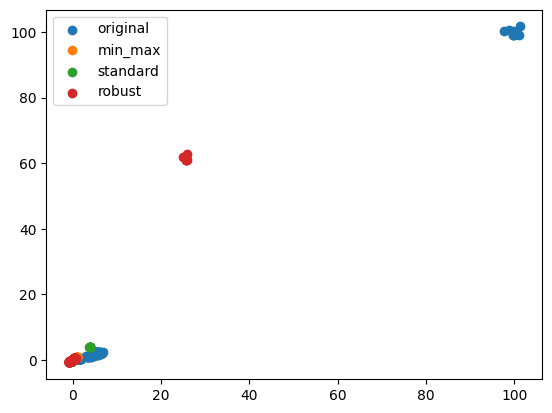

In [27]:
robust = RobustScaler()
X_transform_robust = robust.fit_transform(X)
plt.scatter(X[:,2], X[:,3], label="original")
plt.scatter(X_transform[:,2], X_transform[:,3], label="min_max")
plt.scatter(X_transform_standard[:,2], X_transform_standard[:,3], label="standard")
plt.scatter(X_transform_robust[:,2], X_transform_robust[:,3], label="robust")
plt.legend()

In [28]:
X = np.array([[1],
              [2],
              [0.5]])

In [29]:
PolynomialFeatures(3).fit_transform(X)

array([[1.   , 1.   , 1.   , 1.   ],
       [1.   , 2.   , 4.   , 8.   ],
       [1.   , 0.5  , 0.25 , 0.125]])

In [30]:
X = np.linspace(0, 4, 100).reshape((100,1))
y = X**2 + 5*np.cos(X) + np.random.randn(100,1)


[[0.99070432]]


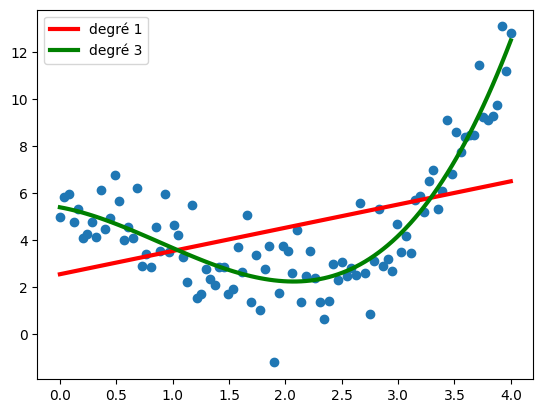

In [31]:
plt.scatter(X, y)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X_poly = PolynomialFeatures(3).fit_transform(X)
model.fit(X, y)
print(model.coef_)
y_pred = model.predict(X)
plt.plot(X, y_pred, c="r", lw=3, label="degré 1")
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
plt.plot(X, y_pred, c="g", lw=3, label="degré 3")
plt.legend()

### Pipeline

In [32]:
from sklearn.pipeline import make_pipeline

In [33]:
model = make_pipeline(PolynomialFeatures(3),
                      LinearRegression())

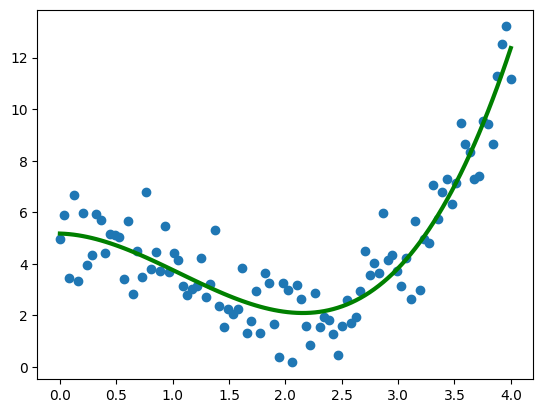

In [34]:
X = np.linspace(0, 4, 100).reshape((100,1))
y = X**2 + 5*np.cos(X) + np.random.randn(100,1)
plt.scatter(X, y)
model.fit(X, y)
y_pred = model.predict(X)
plt.plot(X, y_pred, c="g", lw=3, label="degré 3")

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

In [36]:
X = iris.data 
y = iris.target
train_test_split = int(0.8 * len(X))
X_train, y_train = X[:train_test_split], y[:train_test_split]
X_test, y_test = X[train_test_split:], y[train_test_split:]

In [37]:
model = make_pipeline(PolynomialFeatures(),
                      StandardScaler(),
                      SGDClassifier(random_state=0))
params = {
    "polynomialfeatures__degree": [2, 3, 4],
    "sgdclassifier__penalty": ["l1", "l2"]
}
grid = GridSearchCV(model, param_grid=params, cv=4)
grid.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'sgdclassifier__penalty': ['l1', 'l2']})

In [38]:
grid.score(X_test, y_test)

0.8

In [39]:
model = SGDClassifier(random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.36666666666666664

In [40]:
import seaborn as sns

In [41]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [42]:
X = titanic.drop("survived", axis=1)
y = titanic["survived"]

In [43]:
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer

In [44]:
numerical_features = make_column_selector(dtype_include=np.number)
categorical_features = make_column_selector(dtype_exclude=np.number)

In [45]:
numerical_pipeline = make_pipeline(SimpleImputer(),
                                   StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),
                                     OneHotEncoder())

In [46]:
preprocessor = make_column_transformer((numerical_pipeline, numerical_features), 
                                       (categorical_pipeline, categorical_features))


In [47]:
model = make_pipeline(preprocessor, SGDClassifier())

In [48]:
model.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FFE85D3510>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FFE8540310>)])),
                ('sgdclassifier', SGDClassifier())])

In [49]:
from sklearn.pipeline import make_union

In [50]:
numerical_features = X[["fare", "age"]]

In [51]:
pipeline = make_union(StandardScaler(), Binarizer())

In [52]:
pip = make_pipeline(SimpleImputer(), pipeline)

In [53]:
model = make_pipeline(pip, SGDClassifier())

In [54]:
model.fit(numerical_features, y)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                 ('featureunion',
                                  FeatureUnion(transformer_list=[('standardscaler',
                                                                  StandardScaler()),
                                                                 ('binarizer',
                                                                  Binarizer())]))])),
                ('sgdclassifier', SGDClassifier())])

In [55]:
pip.fit_transform(numerical_features)

array([[-0.50244517, -0.5924806 ,  1.        ,  1.        ],
       [ 0.78684529,  0.63878901,  1.        ,  1.        ],
       [-0.48885426, -0.2846632 ,  1.        ,  1.        ],
       ...,
       [-0.17626324,  0.        ,  1.        ,  1.        ],
       [-0.04438104, -0.2846632 ,  1.        ,  1.        ],
       [-0.49237783,  0.17706291,  1.        ,  1.        ]])

In [56]:
from sklearn.preprocessing import FunctionTransformer

In [57]:
Mon_transformer = FunctionTransformer(func=np.log,
                                      inverse_func=np.exp)

In [75]:
Mon_transformer

FunctionTransformer(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>)

In [58]:
import pandas as pd

In [60]:
ls

 Le volume dans le lecteur C n'a pas de nom.
 Le num�ro de s�rie du volume est ACBD-1610

 R�pertoire de c:\Users\User\Desktop\Git\Portfolio\Deep Learning\PyTorch

03/09/2023  13:19    <DIR>          .
30/08/2023  12:29    <DIR>          ..
30/08/2023  12:35            33�229 00_pytorch_fundamentals_video.ipynb
30/08/2023  12:28            89�573 01_pytorch_workflow_exercises.ipynb
29/08/2023  20:15           369�336 01_pytorch_workflow_video.ipynb
05/09/2023  14:46           248�399 pipeline.ipynb
               4 fichier(s)          740�537 octets
               2 R�p(s)  124�735�696�896 octets libres


In [61]:
titanic = pd.read_csv("tested.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [137]:
def title(dataset):

    titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
   
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',
                                                 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
        # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    return dataset

In [138]:
pipeline = FunctionTransformer(func=title
                               )

In [139]:
pipeline

FunctionTransformer(func=<function title at 0x000001FFED932E80>)

In [140]:
titanic_1 = pipeline.fit_transform(titanic)

In [141]:
titanic_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,3
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,5
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1


In [142]:
titanic = pd.read_csv("tested.csv")

In [143]:
X = titanic.drop("Survived", axis=1)
y = titanic["Survived"]

In [144]:
numerical_features = make_column_selector(dtype_include=np.number)
categorical_features = ["Sex", "Embarked"]
title_features = ["Name"]

In [145]:
numerical_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder())
title_pipeline = FunctionTransformer(func=title)                                 

In [146]:
preprocessor = make_column_transformer((numerical_pipeline, numerical_features), 
                                       (categorical_pipeline, categorical_features),
                                       (title_pipeline, title_features))

In [147]:
res = preprocessor.fit_transform(X)

In [148]:
res = pd.DataFrame(res)

In [149]:
res

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.727912,0.873482,0.466044,-0.49947,-0.400248,-0.497063,0.0,1.0,0.0,1.0,0.0,"Kelly, Mr. James",1
1,-1.719625,0.873482,1.415579,0.616992,-0.400248,-0.511926,1.0,0.0,0.0,0.0,1.0,"Wilkes, Mrs. James (Ellen Needs)",3
2,-1.711337,-0.315819,2.555021,-0.49947,-0.400248,-0.463754,0.0,1.0,0.0,1.0,0.0,"Myles, Mr. Thomas Francis",1
3,-1.70305,0.873482,-0.103676,-0.49947,-0.400248,-0.482127,0.0,1.0,0.0,0.0,1.0,"Wirz, Mr. Albert",1
4,-1.694763,0.873482,-0.48349,0.616992,0.619896,-0.417151,1.0,0.0,0.0,0.0,1.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1.694763,0.873482,-0.559453,-0.49947,-0.400248,-0.493105,0.0,1.0,0.0,0.0,1.0,"Spector, Mr. Woolf",1
414,1.70305,-1.50512,0.807877,-0.49947,-0.400248,1.314557,1.0,0.0,1.0,0.0,0.0,"Oliva y Ocana, Dona. Fermina",5
415,1.711337,0.873482,0.769896,-0.49947,-0.400248,-0.507445,0.0,1.0,0.0,0.0,1.0,"Saether, Mr. Simon Sivertsen",1
416,1.719625,0.873482,-0.559453,-0.49947,-0.400248,-0.493105,0.0,1.0,0.0,0.0,1.0,"Ware, Mr. Frederick",1


In [150]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [151]:
X["Embarked"].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64